# ML Avanti Bootcamp - Projeto de Detecção Facial - ETAPA 1

### Objetivo

Analisar o dataset e apresentar informações do dataset


### 1. Baixar o Dataset

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset/dat")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: camilapinheirodias
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/fareselmenshawii/face-detection-dataset


100%|██████████| 4.43G/4.43G [00:57<00:00, 82.4MB/s]

In [ ]:
!ls

face-detection-dataset	sample_data


### 2. Dataframe com os metadados das imagens

In [ ]:
import cv2
import os

In [ ]:
root_dir = './face-detection-dataset/images'
print(root_dir)

./face-detection-dataset/images


In [ ]:
!pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 6.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import imagehash
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
count_corrupted = 0
corrupted = list()

In [ ]:
dataframe_list = list()
for folder in os.listdir(root_dir):
  child_dir = os.path.join(root_dir, folder)

  for image in os.listdir(child_dir):
    img_dir = os.path.join(child_dir, image)
    _, image_format = image.split('.')
    image_format = image_format.lower()
    img = cv2.imread(img_dir)


    if img is not None:
      img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      # Converter a imagem OpenCV para uma imagem do Pillow
      img_pil = Image.fromarray(img_rgb)

      # Gerar o hash da imagem (usando perceptual hash como exemplo)
      img_hash = imagehash.phash(img_pil)
      width, height, channels = img.shape
      img_corrupted = False
    else:
      count_corrupted += 1
      corrupted.append(img_dir)
      img_corrupted = True
      img_hash, image_format, width, height, channels = None, None, None, None, None

    dataframe_list.append([img_dir, img_corrupted, img_hash, image_format, width, height, channels, folder])

In [9]:
print(f'Total de Imagens Corrompidas: {count_corrupted}\nImagens corrompidas {corrupted}')

Total de Imagens Corrompidas: 0
Imagens corrompidas []


In [10]:
df = pd.DataFrame(columns=['image_path', 'corrupted', 'image_hash', 'image_format', 'width', 'height', 'channels', 'label'], data = dataframe_list)

In [11]:
df.head()

,image_path,corrupted,image_hash,image_format,width,height,channels,label
0,./face-detection-dataset/images/val/700a23315d...,False,90ee6ba59353c8cc,jpg,768,1024,3,val
1,./face-detection-dataset/images/val/57d10dfec1...,False,cfbd2c907439709a,jpg,683,1024,3,val
2,./face-detection-dataset/images/val/1734bba87d...,False,9367673c1958583d,jpg,683,1024,3,val
3,./face-detection-dataset/images/val/d6a952da8c...,False,e96992a76632b646,jpg,1024,683,3,val
4,./face-detection-dataset/images/val/d9872054eb...,False,e4f4596f9a2185f0,jpg,768,1024,3,val


### 3. Integridade dos Arquivos


In [12]:
#Informações estatísticas dos valores de altura, largura e canais das imagens

df.describe().loc[['mean', 'std', 'min', 'max']]

,width,height,channels
mean,806.545867,950.27395,3.0
std,160.886651,151.54427,0.0
min,270.000000,279.00000,3.0
max,3968.000000,4608.00000,3.0


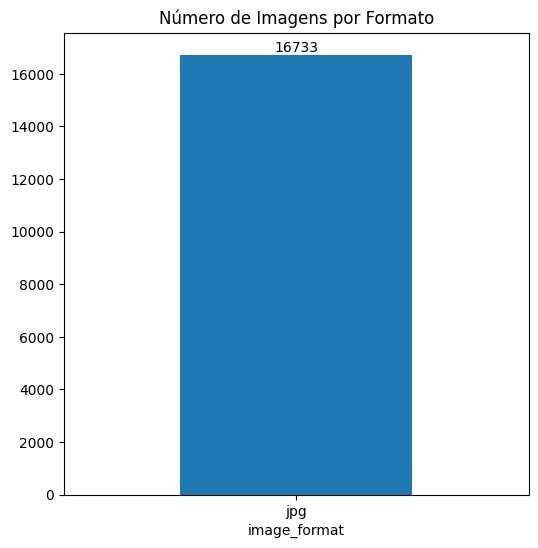

In [13]:
#Quantidade de Imagens por formato

# Geração do gráfico de barras
ax = df['image_format'].value_counts().plot(kind='bar', title='Número de Imagens por Formato', figsize=(6, 6))

# Rotacionando os rótulos no eixo X
plt.xticks(rotation=0)

# Adicionando os valores exatos em cima de cada barra
for p in ax.patches:
    ax.annotate(str(int(p.get_height())),
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.show()

### 4. Consistência dos Metadados

#Distribuição das Dimensões de Altura e Largura das Imagens

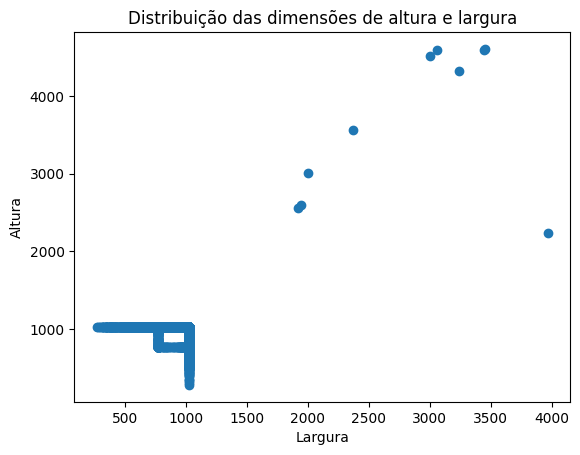

In [14]:
plt.scatter(df['width'], df['height'])
plt.xlabel('Largura')
plt.ylabel('Altura')
plt.title('Distribuição das dimensões de altura e largura')
plt.show()



#Quantidade de informações nulas

In [15]:
df.isnull().sum()

,0
image_path,0
corrupted,0
image_hash,0
image_format,0
width,0
height,0
channels,0
label,0


### 5. Qualidade das Imagens

In [16]:

!pip -q install pillow

import os
import cv2
from PIL import Image, UnidentifiedImageError

def eh_imagem_corrompida(caminho):



    if not isinstance(caminho, str) or caminho.strip() == "" or caminho.strip().lower() == "nan":
        return True


    if not os.path.exists(caminho):
        return True


    if os.path.getsize(caminho) == 0:
        return True


    try:
        with Image.open(caminho) as img:
            img.verify()
    except (UnidentifiedImageError, OSError, ValueError):
        return True


    img_cv = cv2.imread(caminho)
    if img_cv is None:
        return True


    try:
        if img_cv.ndim == 3 and img_cv.shape[2] >= 3:
            _ = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
    except Exception:
        return True

    return False


if "df" not in globals():
    raise RuntimeError("Não achei o DataFrame 'df'. Rode as células anteriores até criar o df.")

if "image_path" not in df.columns:
    raise RuntimeError("Não achei a coluna 'image_path' no df. Confira onde está o caminho das imagens.")

df["corrupted_q5"] = [eh_imagem_corrompida(p) for p in df["image_path"].tolist()]

count_corrupted_q5 = int(df["corrupted_q5"].sum())
corrupted_q5 = df.loc[df["corrupted_q5"], "image_path"].tolist()

print("ETAPA 5 (Qualidade das Imagens) concluída ✅")
print("Total com problema (corrupted_q5=True):", count_corrupted_q5)
print("Exemplos (até 10):")
for p in corrupted_q5[:10]:
    print("-", p)




ETAPA 5 (Qualidade das Imagens) concluída ✅
Total com problema (corrupted_q5=True): 0
Exemplos (até 10):


### 6. Distribuição das Classes

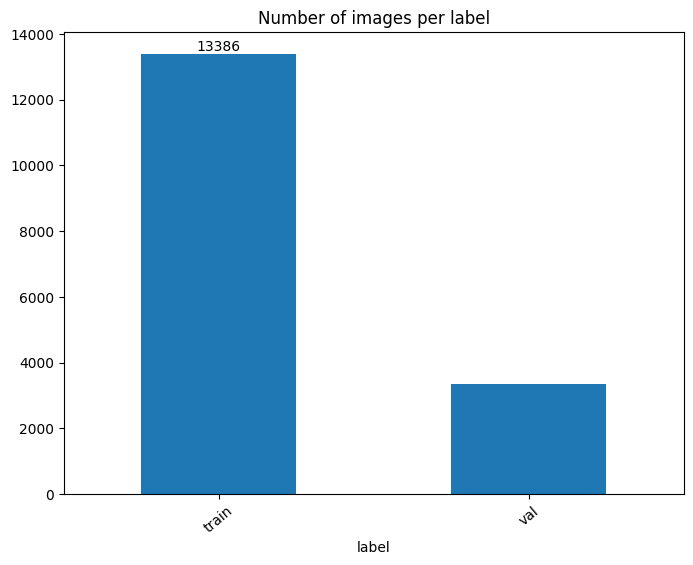

In [17]:
ax = df['label'].value_counts().plot(kind='bar', title='Number of images per label', figsize=(8,6))

plt.xticks(rotation=40)

for p in ax.patches:
  ax.annotate(str(int(p.get_height())),
              (p.get_x() + p.get_width() / 2, p.get_height()),
              ha='center', va='bottom', fontsize=10)

  plt.show()

### 7. Presença de Duplicatas